In [1]:
from flytracker.tracker import Tracker
from flytracker.utils import FourArenasQRCodeMask

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
mask = FourArenasQRCodeMask().mask
tracker = Tracker(40, mask)

In [3]:
%%time
locs = tracker.run('../../data/movies/4arenas_QR.h264', 1000)

CPU times: user 2min 3s, sys: 5.32 s, total: 2min 8s
Wall time: 17.6 s


In [7]:
frame = 100
cap = cv.VideoCapture('../../data/movies/4arenas_QR.mp4') #video_name is the video being called
cap.set(1, frame); # Where frame_no is the frame you want
ret, image = cap.read() # Read the frame

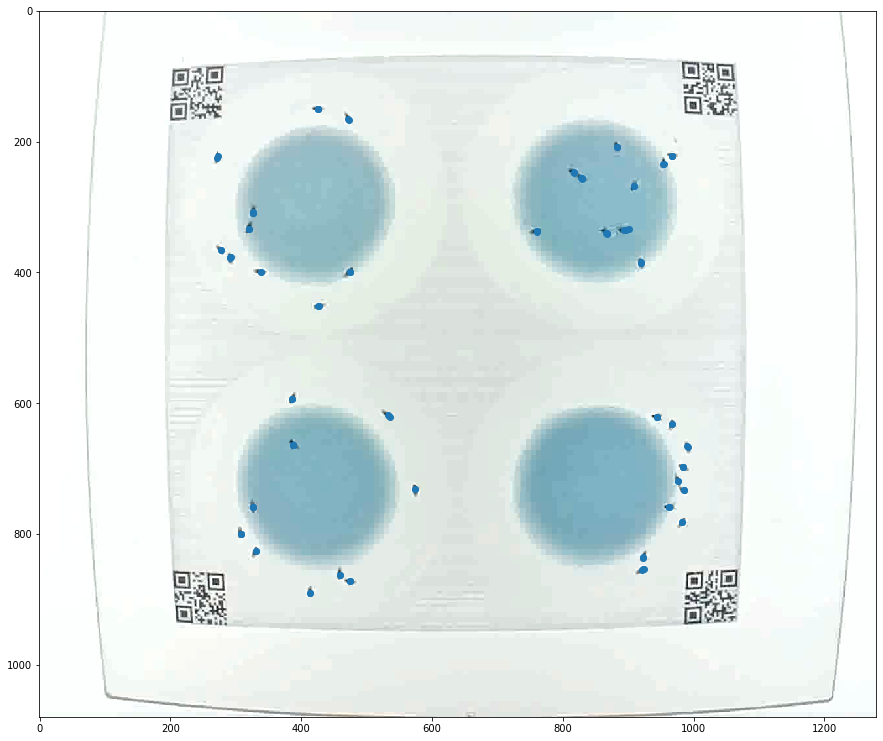

In [9]:
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.scatter(locs[(40*frame):((40+1)*frame), 1], locs[(40*frame):((40+1)*frame), 0])

In [63]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
np.putmask(image, ~mask, 255)
image = cv.threshold(image, 120, 255, cv.THRESH_BINARY_INV)[1]

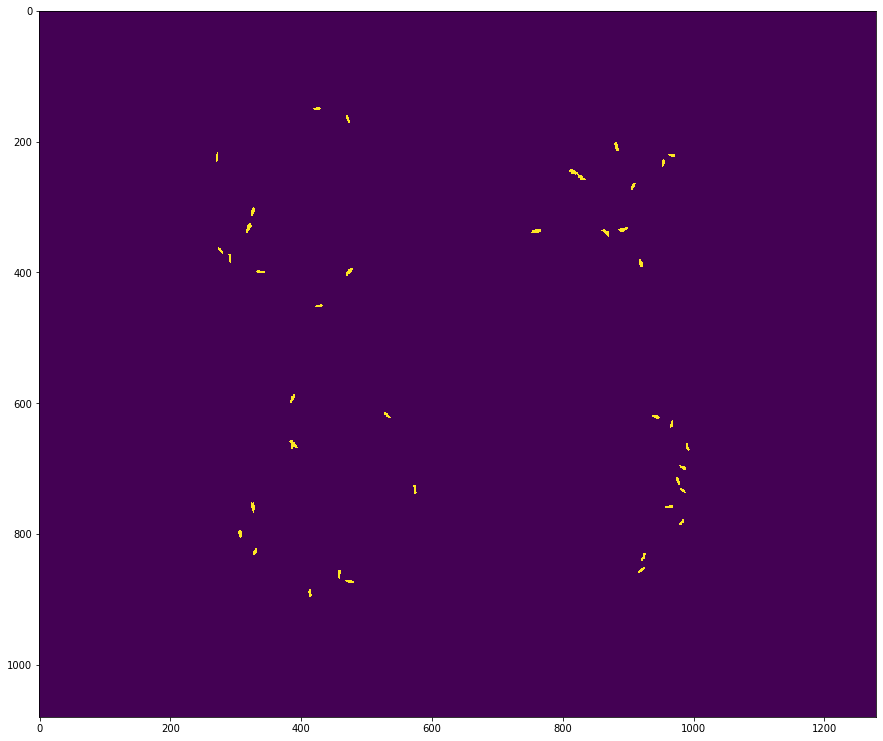

In [64]:
plt.figure(figsize=(15, 15))
plt.imshow(image)

In [65]:
fly_pixels = np.stack(np.nonzero(image), axis=1)

In [66]:
np.sum(fly_pixels)

2421110

In [67]:
np.sum(np.stack(np.where(image != 0), axis=1))

2421110